<a href="https://colab.research.google.com/github/Nohyunjin/pandascookbook/blob/main/cookbook_7%ED%96%89_%ED%95%84%ED%84%B0%EB%A7%81.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
movie = pd.read_csv("/content/drive/MyDrive/데이터 사이언스 + R/pandas_cookbook/pandas-cookbook-2e-main/data/movie.csv", index_col = "movie_title")
movie[["duration"]].head()

,duration
movie_title,
Avatar,178.0
Pirates of the Caribbean: At World's End,169.0
Spectre,148.0
The Dark Knight Rises,164.0
Star Wars: Episode VII - The Force Awakens,NaN


In [ ]:
movie_2_hours = movie["duration"] > 120
movie_2_hours

movie_title
Avatar                                         True
Pirates of the Caribbean: At World's End       True
Spectre                                        True
The Dark Knight Rises                          True
Star Wars: Episode VII - The Force Awakens    False
                                              ...  
Signed Sealed Delivered                       False
The Following                                 False
A Plague So Pleasant                          False
Shanghai Calling                              False
My Date with Drew                             False
Name: duration, Length: 4916, dtype: bool

In [ ]:
movie_2_hours.sum()

1039

In [ ]:
movie_2_hours.mean() * 100

21.13506916192026

In [ ]:
movie["duration"].dropna().gt(120).mean() * 100

21.199755152009793

In [ ]:
movie_2_hours.describe()

count      4916
unique        2
top       False
freq       3877
Name: duration, dtype: object

In [ ]:
movie_2_hours.value_counts(normalize=True)

False    0.788649
True     0.211351
Name: duration, dtype: float64

In [ ]:
movie_2_hours.astype(int).describe()

count    4916.000000
mean        0.211351
std         0.408308
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: duration, dtype: float64

In [ ]:
actors = movie[["actor_1_facebook_likes", "actor_2_facebook_likes"]].dropna()
actors["actor_1_facebook_likes"] > actors["actor_2_facebook_likes"].mean()

movie_title
Avatar                                        False
Pirates of the Caribbean: At World's End       True
Spectre                                        True
The Dark Knight Rises                          True
Star Wars: Episode VII - The Force Awakens    False
                                              ...  
Signed Sealed Delivered                       False
The Following                                 False
A Plague So Pleasant                          False
Shanghai Calling                              False
My Date with Drew                             False
Name: actor_1_facebook_likes, Length: 4903, dtype: bool

In [ ]:
criteria1 = movie.imdb_score > 8
criteria2 = movie.content_rating == "PG-13"
criteria3 = (movie.title_year < 2000) | (movie.title_year) > 2009

In [ ]:
criteria_final = criteria1 & criteria2 & criteria3
criteria_final.head()

movie_title
Avatar                                        False
Pirates of the Caribbean: At World's End      False
Spectre                                       False
The Dark Knight Rises                         False
Star Wars: Episode VII - The Force Awakens    False
dtype: bool

In [ ]:
True or False

True

In [ ]:
crit_b1 = movie.imdb_score < 5
crit_b2 = movie.content_rating == "R"
crit_b3 = (movie.title_year >= 2000) & (movie.title_year <= 2010)
final_crit_b = crit_b1 & crit_b2 & crit_b3

In [ ]:
final_crit_all = criteria_final | final_crit_b
final_crit_all.head()

movie_title
Avatar                                        False
Pirates of the Caribbean: At World's End      False
Spectre                                       False
The Dark Knight Rises                         False
Star Wars: Episode VII - The Force Awakens    False
dtype: bool

In [ ]:
movie[final_crit_all].head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
movie_title,,,,,,,,,,,,,,,,,,,,,,,,,,,
Town & Country,Color,Peter Chelsom,62.0,104.0,23.0,591.0,Warren Beatty,752.0,6712451.0,Comedy|Romance,Del Zamora,4102,3133,Garry Shandling,0.0,anniversary|architect|cellist|friend|hardware ...,http://www.imdb.com/title/tt0141907/?ref_=fn_t...,89.0,English,New Line,R,90000000.0,2001.0,631.0,4.4,1.85,53
Sex and the City 2,Color,Michael Patrick King,221.0,146.0,127.0,722.0,Liza Minnelli,962.0,95328937.0,Comedy|Drama|Romance,Chris Noth,59581,4555,Kristin Davis,4.0,abu dhabi|box office hit|muslim|nanny|united a...,http://www.imdb.com/title/tt1261945/?ref_=fn_t...,293.0,English,USA,R,100000000.0,2010.0,740.0,4.3,1.85,0
Rollerball,Color,John McTiernan,151.0,98.0,323.0,390.0,Chris Klein,1000.0,18990542.0,Action|Sci-Fi|Sport,LL Cool J,22264,2763,Andrew Bryniarski,3.0,ball|blood|skating|song|year 2005,http://www.imdb.com/title/tt0246894/?ref_=fn_t...,289.0,English,USA,R,70000000.0,2002.0,841.0,3.0,2.35,584
Ballistic: Ecks vs. Sever,Color,Wych Kaosayananda,92.0,91.0,8.0,298.0,Sandrine Holt,349.0,14294842.0,Action|Crime|Sci-Fi|Thriller,Talisa Soto,16761,1846,Gregg Henry,1.0,blood splatter|camera shot from inside human b...,http://www.imdb.com/title/tt0308208/?ref_=fn_t...,277.0,English,USA,R,70000000.0,2002.0,324.0,3.6,2.35,391
Basic Instinct 2,Color,Michael Caton-Jones,159.0,116.0,105.0,246.0,Indira Varma,844.0,5851188.0,Crime|Mystery|Thriller,Charlotte Rampling,31124,1899,Neil Maskell,1.0,drugs|murder|psychiatrist|scotland yard|sex,http://www.imdb.com/title/tt0430912/?ref_=fn_t...,313.0,English,UK,R,70000000.0,2006.0,729.0,4.2,2.35,764


In [ ]:
movie.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
movie_title,,,,,,,,,,,,,,,,,,,,,,,,,,,
Avatar,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
Pirates of the Caribbean: At World's End,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
Spectre,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,275868,11700,Stephanie Sigman,1.0,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
The Dark Knight Rises,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,1144337,106759,Joseph Gordon-Levitt,0.0,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
Star Wars: Episode VII - The Force Awakens,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,Doug Walker,8,143,NaN,0.0,NaN,http://www.imdb.com/title/tt5289954/?ref_=fn_t...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [ ]:
movie.loc[final_crit_all].head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
movie_title,,,,,,,,,,,,,,,,,,,,,,,,,,,
Town & Country,Color,Peter Chelsom,62.0,104.0,23.0,591.0,Warren Beatty,752.0,6712451.0,Comedy|Romance,Del Zamora,4102,3133,Garry Shandling,0.0,anniversary|architect|cellist|friend|hardware ...,http://www.imdb.com/title/tt0141907/?ref_=fn_t...,89.0,English,New Line,R,90000000.0,2001.0,631.0,4.4,1.85,53
Sex and the City 2,Color,Michael Patrick King,221.0,146.0,127.0,722.0,Liza Minnelli,962.0,95328937.0,Comedy|Drama|Romance,Chris Noth,59581,4555,Kristin Davis,4.0,abu dhabi|box office hit|muslim|nanny|united a...,http://www.imdb.com/title/tt1261945/?ref_=fn_t...,293.0,English,USA,R,100000000.0,2010.0,740.0,4.3,1.85,0
Rollerball,Color,John McTiernan,151.0,98.0,323.0,390.0,Chris Klein,1000.0,18990542.0,Action|Sci-Fi|Sport,LL Cool J,22264,2763,Andrew Bryniarski,3.0,ball|blood|skating|song|year 2005,http://www.imdb.com/title/tt0246894/?ref_=fn_t...,289.0,English,USA,R,70000000.0,2002.0,841.0,3.0,2.35,584
Ballistic: Ecks vs. Sever,Color,Wych Kaosayananda,92.0,91.0,8.0,298.0,Sandrine Holt,349.0,14294842.0,Action|Crime|Sci-Fi|Thriller,Talisa Soto,16761,1846,Gregg Henry,1.0,blood splatter|camera shot from inside human b...,http://www.imdb.com/title/tt0308208/?ref_=fn_t...,277.0,English,USA,R,70000000.0,2002.0,324.0,3.6,2.35,391
Basic Instinct 2,Color,Michael Caton-Jones,159.0,116.0,105.0,246.0,Indira Varma,844.0,5851188.0,Crime|Mystery|Thriller,Charlotte Rampling,31124,1899,Neil Maskell,1.0,drugs|murder|psychiatrist|scotland yard|sex,http://www.imdb.com/title/tt0430912/?ref_=fn_t...,313.0,English,UK,R,70000000.0,2006.0,729.0,4.2,2.35,764


In [ ]:
cols = ["imdb_score", "content_rating", "title_year"]
movie_filtered = movie.loc[final_crit_all, cols]
movie_filtered.head(10)

,imdb_score,content_rating,title_year
movie_title,,,
Town & Country,4.4,R,2001.0
Sex and the City 2,4.3,R,2010.0
Rollerball,3.0,R,2002.0
Ballistic: Ecks vs. Sever,3.6,R,2002.0
Basic Instinct 2,4.2,R,2006.0
Gigli,2.4,R,2003.0
Aliens vs. Predator: Requiem,4.7,R,2007.0
Feardotcom,3.3,R,2002.0
Virgin Territory,4.8,R,2007.0


In [ ]:
movie.iloc[final_crit_all.to_numpy()]

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
movie_title,,,,,,,,,,,,,,,,,,,,,,,,,,,
Town & Country,Color,Peter Chelsom,62.0,104.0,23.0,591.0,Warren Beatty,752.0,6712451.0,Comedy|Romance,Del Zamora,4102,3133,Garry Shandling,0.0,anniversary|architect|cellist|friend|hardware ...,http://www.imdb.com/title/tt0141907/?ref_=fn_t...,89.0,English,New Line,R,90000000.0,2001.0,631.0,4.4,1.85,53
Sex and the City 2,Color,Michael Patrick King,221.0,146.0,127.0,722.0,Liza Minnelli,962.0,95328937.0,Comedy|Drama|Romance,Chris Noth,59581,4555,Kristin Davis,4.0,abu dhabi|box office hit|muslim|nanny|united a...,http://www.imdb.com/title/tt1261945/?ref_=fn_t...,293.0,English,USA,R,100000000.0,2010.0,740.0,4.3,1.85,0
Rollerball,Color,John McTiernan,151.0,98.0,323.0,390.0,Chris Klein,1000.0,18990542.0,Action|Sci-Fi|Sport,LL Cool J,22264,2763,Andrew Bryniarski,3.0,ball|blood|skating|song|year 2005,http://www.imdb.com/title/tt0246894/?ref_=fn_t...,289.0,English,USA,R,70000000.0,2002.0,841.0,3.0,2.35,584
Ballistic: Ecks vs. Sever,Color,Wych Kaosayananda,92.0,91.0,8.0,298.0,Sandrine Holt,349.0,14294842.0,Action|Crime|Sci-Fi|Thriller,Talisa Soto,16761,1846,Gregg Henry,1.0,blood splatter|camera shot from inside human b...,http://www.imdb.com/title/tt0308208/?ref_=fn_t...,277.0,English,USA,R,70000000.0,2002.0,324.0,3.6,2.35,391
Basic Instinct 2,Color,Michael Caton-Jones,159.0,116.0,105.0,246.0,Indira Varma,844.0,5851188.0,Crime|Mystery|Thriller,Charlotte Rampling,31124,1899,Neil Maskell,1.0,drugs|murder|psychiatrist|scotland yard|sex,http://www.imdb.com/title/tt0430912/?ref_=fn_t...,313.0,English,UK,R,70000000.0,2006.0,729.0,4.2,2.35,764
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Frat Party,Color,Robert Bennett,6.0,90.0,15.0,106.0,Lauren C. Mayhew,984.0,NaN,Comedy,Randy Wayne,1612,1752,Alicia Ziegler,4.0,erotica|masseuse|sister sister relationship|te...,http://www.imdb.com/title/tt1414361/?ref_=fn_t...,28.0,English,USA,R,1000000.0,2009.0,157.0,2.8,16.00,297
The Young Unknowns,Color,Catherine Jelski,13.0,87.0,0.0,258.0,Eion Bailey,1000.0,58163.0,Drama,Leslie Bibb,122,2359,Arly Jover,0.0,based on play|independent film,http://www.imdb.com/title/tt0186719/?ref_=fn_t...,3.0,English,USA,R,NaN,2000.0,749.0,4.2,NaN,4
Bled,Color,Christopher Hutson,8.0,95.0,3.0,118.0,Jennifer Lee Wiggins,717.0,NaN,Horror,Dichen Lachman,851,1117,Michele Morrow,0.0,artist|blood|drug|tree sap|vampire,http://www.imdb.com/title/tt0997143/?ref_=fn_t...,30.0,English,USA,R,750000.0,2009.0,134.0,3.1,1.85,128


In [ ]:
college = pd.read_csv("/content/drive/MyDrive/데이터 사이언스 + R/pandas_cookbook/pandas-cookbook-2e-main/data/college.csv")

In [ ]:
college[college["STABBR"] == "TX"].head()

,INSTNM,CITY,STABBR,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,UGDS,UGDS_WHITE,UGDS_BLACK,UGDS_HISP,UGDS_ASIAN,UGDS_AIAN,UGDS_NHPI,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
3610,Abilene Christian University,Abilene,TX,0.0,0.0,0.0,1,530.0,545.0,0.0,3572.0,0.6739,0.0798,0.1414,0.0090,0.0039,0.0000,0.0454,0.0423,0.0045,0.0468,1,0.2595,0.5527,0.0381,40200,25985
3611,Alvin Community College,Alvin,TX,0.0,0.0,0.0,0,NaN,NaN,0.0,4682.0,0.5126,0.1034,0.3093,0.0500,0.0064,0.0038,0.0002,0.0000,0.0143,0.7123,1,0.1549,0.0625,0.2841,34500,6750
3612,Amarillo College,Amarillo,TX,0.0,0.0,0.0,0,NaN,NaN,0.0,9346.0,0.5104,0.0507,0.3888,0.0293,0.0122,0.0000,0.0000,0.0001,0.0085,0.6922,1,0.3786,0.1573,0.3431,31700,10950
3613,Angelina College,Lufkin,TX,0.0,0.0,0.0,0,NaN,NaN,0.0,3825.0,0.5854,0.1508,0.2207,0.0076,0.0073,0.0013,0.0264,0.0005,0.0000,0.5600,1,0.5308,0.0000,0.2603,26900,PrivacySuppressed
3614,Angelo State University,San Angelo,TX,0.0,0.0,0.0,0,475.0,490.0,0.0,5290.0,0.5225,0.0841,0.3166,0.0087,0.0036,0.0017,0.0285,0.0331,0.0011,0.1289,1,0.4068,0.5279,0.1407,37700,21319.5


In [ ]:
college2 = college.set_index("STABBR")
college2.loc["TX"].head()

,INSTNM,CITY,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,UGDS,UGDS_WHITE,UGDS_BLACK,UGDS_HISP,UGDS_ASIAN,UGDS_AIAN,UGDS_NHPI,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
STABBR,,,,,,,,,,,,,,,,,,,,,,,,,,
TX,Abilene Christian University,Abilene,0.0,0.0,0.0,1,530.0,545.0,0.0,3572.0,0.6739,0.0798,0.1414,0.0090,0.0039,0.0000,0.0454,0.0423,0.0045,0.0468,1,0.2595,0.5527,0.0381,40200,25985
TX,Alvin Community College,Alvin,0.0,0.0,0.0,0,NaN,NaN,0.0,4682.0,0.5126,0.1034,0.3093,0.0500,0.0064,0.0038,0.0002,0.0000,0.0143,0.7123,1,0.1549,0.0625,0.2841,34500,6750
TX,Amarillo College,Amarillo,0.0,0.0,0.0,0,NaN,NaN,0.0,9346.0,0.5104,0.0507,0.3888,0.0293,0.0122,0.0000,0.0000,0.0001,0.0085,0.6922,1,0.3786,0.1573,0.3431,31700,10950
TX,Angelina College,Lufkin,0.0,0.0,0.0,0,NaN,NaN,0.0,3825.0,0.5854,0.1508,0.2207,0.0076,0.0073,0.0013,0.0264,0.0005,0.0000,0.5600,1,0.5308,0.0000,0.2603,26900,PrivacySuppressed
TX,Angelo State University,San Angelo,0.0,0.0,0.0,0,475.0,490.0,0.0,5290.0,0.5225,0.0841,0.3166,0.0087,0.0036,0.0017,0.0285,0.0331,0.0011,0.1289,1,0.4068,0.5279,0.1407,37700,21319.5


In [ ]:
%timeit college[college["STABBR"] == "TX"]


1000 loops, best of 5: 971 µs per loop


In [ ]:
%timeit college2.loc['TX']

1000 loops, best of 5: 498 µs per loop


In [ ]:
states = ["TX", "CA", "NY"]
college[college["STABBR"].isin(states)]

,INSTNM,CITY,STABBR,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,UGDS,UGDS_WHITE,UGDS_BLACK,UGDS_HISP,UGDS_ASIAN,UGDS_AIAN,UGDS_NHPI,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
192,Academy of Art University,San Francisco,CA,0.0,0.0,0.0,0,NaN,NaN,0.0,9885.0,0.2392,0.0685,0.1141,0.0804,0.0051,0.0058,0.0249,0.2523,0.2098,0.4334,1,0.4008,0.5524,0.4043,36000,35093
193,ITT Technical Institute-Rancho Cordova,Rancho Cordova,CA,0.0,0.0,0.0,0,NaN,NaN,0.0,500.0,0.4720,0.1140,0.1100,0.0760,0.0080,0.0020,0.0400,0.0000,0.1780,0.2540,0,0.7137,0.7667,0.7235,38800,25827.5
194,Academy of Chinese Culture and Health Sciences,Oakland,CA,0.0,0.0,0.0,0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,PrivacySuppressed
195,The Academy of Radio and TV Broadcasting,Huntington Beach,CA,0.0,0.0,0.0,0,NaN,NaN,0.0,14.0,0.2143,0.4286,0.3571,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1,0.9579,1.0000,0.4545,28400,9500
196,Avalon School of Cosmetology-Alameda,Alameda,CA,0.0,0.0,0.0,0,NaN,NaN,0.0,253.0,0.1265,0.4743,0.2253,0.0672,0.0079,0.0000,0.0553,0.0000,0.0435,0.5099,1,0.7407,0.6768,0.3387,21600,9860
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7528,WestMed College - Merced,Merced,CA,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,15623.5
7529,Vantage College,El Paso,TX,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,9500
7530,SAE Institute of Technology San Francisco,Emeryville,CA,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,9500
7533,Bay Area Medical Academy - San Jose Satellite ...,San Jose,CA,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,PrivacySuppressed


In [ ]:
college2.loc[states]

,INSTNM,CITY,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,UGDS,UGDS_WHITE,UGDS_BLACK,UGDS_HISP,UGDS_ASIAN,UGDS_AIAN,UGDS_NHPI,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
STABBR,,,,,,,,,,,,,,,,,,,,,,,,,,
TX,Abilene Christian University,Abilene,0.0,0.0,0.0,1,530.0,545.0,0.0,3572.0,0.6739,0.0798,0.1414,0.0090,0.0039,0.0000,0.0454,0.0423,0.0045,0.0468,1,0.2595,0.5527,0.0381,40200,25985
TX,Alvin Community College,Alvin,0.0,0.0,0.0,0,NaN,NaN,0.0,4682.0,0.5126,0.1034,0.3093,0.0500,0.0064,0.0038,0.0002,0.0000,0.0143,0.7123,1,0.1549,0.0625,0.2841,34500,6750
TX,Amarillo College,Amarillo,0.0,0.0,0.0,0,NaN,NaN,0.0,9346.0,0.5104,0.0507,0.3888,0.0293,0.0122,0.0000,0.0000,0.0001,0.0085,0.6922,1,0.3786,0.1573,0.3431,31700,10950
TX,Angelina College,Lufkin,0.0,0.0,0.0,0,NaN,NaN,0.0,3825.0,0.5854,0.1508,0.2207,0.0076,0.0073,0.0013,0.0264,0.0005,0.0000,0.5600,1,0.5308,0.0000,0.2603,26900,PrivacySuppressed
TX,Angelo State University,San Angelo,0.0,0.0,0.0,0,475.0,490.0,0.0,5290.0,0.5225,0.0841,0.3166,0.0087,0.0036,0.0017,0.0285,0.0331,0.0011,0.1289,1,0.4068,0.5279,0.1407,37700,21319.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NY,Briarcliffe College–Patchogue,Patchogue,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,38200,28720.5
NY,Jamestown Business College -,Salamanca,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,12050
NY,Pratt Manhattan-A Division of Pratt Institute,New York,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,40900,26691


In [ ]:
college = pd.read_csv("/content/drive/MyDrive/데이터 사이언스 + R/pandas_cookbook/pandas-cookbook-2e-main/data/college.csv")
college2 = college.set_index("STABBR")
college2.index.is_monotonic

False

In [ ]:
college3 = college2.sort_index()
college3.index.is_monotonic

True

In [ ]:
college_unique = college.set_index("INSTNM")
college_unique.index.is_unique

True

In [ ]:
college[college["INSTNM"] == "Stanford University"]

,INSTNM,CITY,STABBR,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,UGDS,UGDS_WHITE,UGDS_BLACK,UGDS_HISP,UGDS_ASIAN,UGDS_AIAN,UGDS_NHPI,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
4217,Stanford University,Stanford,CA,0.0,0.0,0.0,0,730.0,745.0,0.0,7018.0,0.3752,0.0591,0.1607,0.1979,0.0114,0.0038,0.1067,0.0819,0.0031,0.0,1,0.1556,0.1256,0.0401,86000,12782


In [ ]:
employee = pd.read_csv("/content/drive/MyDrive/데이터 사이언스 + R/pandas_cookbook/pandas-cookbook-2e-main/data/employee.csv")

In [ ]:
employee.dtypes

UNIQUE_ID              int64
POSITION_TITLE        object
DEPARTMENT            object
BASE_SALARY          float64
RACE                  object
EMPLOYMENT_TYPE       object
GENDER                object
EMPLOYMENT_STATUS     object
HIRE_DATE             object
JOB_DATE              object
dtype: object

In [ ]:
employee.DEPARTMENT.value_counts().head()

Houston Police Department-HPD     638
Houston Fire Department (HFD)     384
Public Works & Engineering-PWE    343
Health & Human Services           110
Houston Airport System (HAS)      106
Name: DEPARTMENT, dtype: int64

In [ ]:
employee.GENDER.value_counts()

Male      1397
Female     603
Name: GENDER, dtype: int64

In [ ]:
employee.BASE_SALARY.describe()

count      1886.000000
mean      55767.931601
std       21693.706679
min       24960.000000
25%       40170.000000
50%       54461.000000
75%       66614.000000
max      275000.000000
Name: BASE_SALARY, dtype: float64

In [ ]:
depts = ["Houston Police Department-HPD",
         "Houston Fire Department (HFD)",]

In [ ]:
criteria_dept = employee.DEPARTMENT.isin(depts)
criteria_gender = employee.GENDER == "Female"
criteria_sal = (employee.BASE_SALARY >= 80000) & (employee.BASE_SALARY <= 120000)

In [ ]:
criteria_final = (criteria_dept & criteria_gender & criteria_sal)

In [ ]:
select_columns = ["UNIQUE_ID", "DEPARTMENT", "GENDER", "BASE_SALARY"]
employee.loc[criteria_final, select_columns].head()

,UNIQUE_ID,DEPARTMENT,GENDER,BASE_SALARY
61,61,Houston Fire Department (HFD),Female,96668.0
136,136,Houston Police Department-HPD,Female,81239.0
367,367,Houston Police Department-HPD,Female,86534.0
474,474,Houston Police Department-HPD,Female,91181.0
513,513,Houston Police Department-HPD,Female,81239.0


In [ ]:
top_5_depts = employee.DEPARTMENT.value_counts().index[:5]
criteria = ~employee.DEPARTMENT.isin(top_5_depts)
employee[criteria]

,UNIQUE_ID,POSITION_TITLE,DEPARTMENT,BASE_SALARY,RACE,EMPLOYMENT_TYPE,GENDER,EMPLOYMENT_STATUS,HIRE_DATE,JOB_DATE
0,0,ASSISTANT DIRECTOR (EX LVL),Municipal Courts Department,121862.0,Hispanic/Latino,Full Time,Female,Active,2006-06-12,2012-10-13
1,1,LIBRARY ASSISTANT,Library,26125.0,Hispanic/Latino,Full Time,Female,Active,2000-07-19,2010-09-18
4,4,ELECTRICIAN,General Services Department,56347.0,White,Full Time,Male,Active,1989-06-19,1994-10-22
18,18,MAINTENANCE MECHANIC III,General Services Department,40581.0,Hispanic/Latino,Full Time,Male,Active,2008-12-29,2008-12-29
32,32,SENIOR ACCOUNTANT,Finance,46963.0,Black or African American,Full Time,Male,Active,1991-02-11,2016-02-13
...,...,...,...,...,...,...,...,...,...,...
1976,1976,SENIOR SIDELOADER OPERATOR,Solid Waste Management,34466.0,Hispanic/Latino,Full Time,Female,Active,2015-07-20,2016-01-30
1983,1983,ADMINISTRATIVE SPECIALIST,Admn. & Regulatory Affairs,55172.0,Black or African American,Full Time,Female,Active,2006-10-16,2006-10-16
1985,1985,TRUCK DRIVER,Fleet Management Department,30222.0,Black or African American,Full Time,Male,Active,2013-06-10,2015-08-01
1988,1988,SENIOR ASSISTANT CITY ATTORNEY II,Legal Department,124115.0,White,Full Time,Male,Active,2013-01-23,2013-03-02


In [ ]:
depts = ["Houston Police Department-HPD",
         "Houston Fir Departmnet (HFD)",]
select_columns = ["UNIQUE_ID",
                  "DEPARTMENT",
                  "GENDER",
                  "BASE_SALARY",]

In [ ]:
qs = (
    "DEPARTMENT in @depts "
    " and GENDER == 'Female' "
    " and 80000 <= BASE_SALARY <= 120000"
)

emp_filtered = employee.query(qs)
emp_filtered[select_columns].head()

,UNIQUE_ID,DEPARTMENT,GENDER,BASE_SALARY
136,136,Houston Police Department-HPD,Female,81239.0
367,367,Houston Police Department-HPD,Female,86534.0
474,474,Houston Police Department-HPD,Female,91181.0
513,513,Houston Police Department-HPD,Female,81239.0
564,564,Houston Police Department-HPD,Female,81239.0


In [ ]:
top10_depts = (
    employee.DEPARTMENT.value_counts().index[:10].tolist()
)
qs = "DEPARTMENT not in @top10_depts and GENDER == 'Female'"
employee_filtered2 = employee.query(qs)
employee_filtered2

,UNIQUE_ID,POSITION_TITLE,DEPARTMENT,BASE_SALARY,RACE,EMPLOYMENT_TYPE,GENDER,EMPLOYMENT_STATUS,HIRE_DATE,JOB_DATE
0,0,ASSISTANT DIRECTOR (EX LVL),Municipal Courts Department,121862.0,Hispanic/Latino,Full Time,Female,Active,2006-06-12,2012-10-13
73,73,ADMINISTRATIVE SPECIALIST,Human Resources Dept.,55939.0,Black or African American,Full Time,Female,Active,2011-12-19,2013-11-23
96,96,ASSISTANT CITY CONTROLLER III,City Controller's Office,59077.0,Asian/Pacific Islander,Full Time,Female,Active,2013-06-10,2013-06-10
117,117,SENIOR ASSISTANT CITY ATTORNEY I,Legal Department,90957.0,Black or African American,Full Time,Female,Active,1998-03-20,2012-07-21
146,146,SENIOR STAFF ANALYST,Houston Information Tech Svcs,74951.0,White,Full Time,Female,Active,2014-03-17,2014-03-17
...,...,...,...,...,...,...,...,...,...,...
1912,1912,SENIOR HUMAN RESOURCES GENERALIST,Human Resources Dept.,54938.0,Black or African American,Full Time,Female,Active,2012-07-30,2012-07-30
1933,1933,HUMAN RESOURCES MANAGER,Human Resources Dept.,74435.0,Black or African American,Full Time,Female,Active,2004-10-11,2015-05-23
1946,1946,SENIOR ASSISTANT CITY ATTORNEY II,Legal Department,117831.0,Asian/Pacific Islander,Full Time,Female,Active,2005-07-18,2012-07-21
1952,1952,9-1-1 TELECOMMUNICATOR,Houston Emergency Center (HEC),39104.0,Black or African American,Full Time,Female,Active,2005-05-31,2005-05-31


In [ ]:
movie = pd.read_csv("/content/drive/MyDrive/데이터 사이언스 + R/pandas_cookbook/pandas-cookbook-2e-main/data/movie.csv", index_col = "movie_title")
fb_likes = movie["actor_1_facebook_likes"].dropna()
fb_likes.head()

movie_title
Avatar                                         1000.0
Pirates of the Caribbean: At World's End      40000.0
Spectre                                       11000.0
The Dark Knight Rises                         27000.0
Star Wars: Episode VII - The Force Awakens      131.0
Name: actor_1_facebook_likes, dtype: float64

In [ ]:
fb_likes.describe()

count      4909.000000
mean       6494.488491
std       15106.986884
min           0.000000
25%         607.000000
50%         982.000000
75%       11000.000000
max      640000.000000
Name: actor_1_facebook_likes, dtype: float64

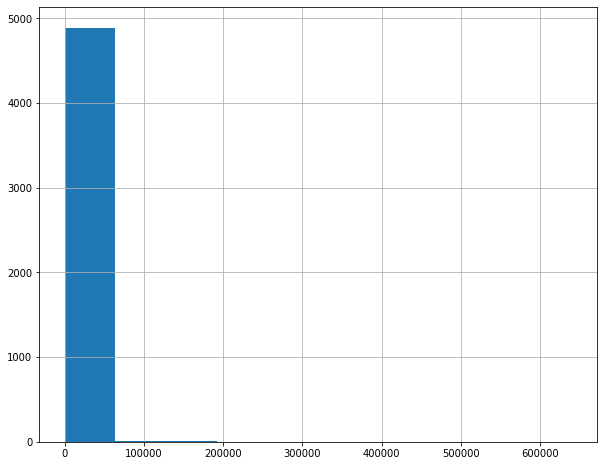

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize = (10, 8))
fb_likes.hist(ax=ax)

In [ ]:
criteria_high = fb_likes < 20_000
criteria_high.mean().round(2)

0.91

In [ ]:
fb_likes.where(criteria_high).head()

movie_title
Avatar                                         1000.0
Pirates of the Caribbean: At World's End          NaN
Spectre                                       11000.0
The Dark Knight Rises                             NaN
Star Wars: Episode VII - The Force Awakens      131.0
Name: actor_1_facebook_likes, dtype: float64

In [ ]:
fb_likes.where(criteria_high, other = 20000).head()

movie_title
Avatar                                         1000.0
Pirates of the Caribbean: At World's End      20000.0
Spectre                                       11000.0
The Dark Knight Rises                         20000.0
Star Wars: Episode VII - The Force Awakens      131.0
Name: actor_1_facebook_likes, dtype: float64

In [ ]:
criteria_low = fb_likes > 300
fb_likes_cap = fb_likes.where(
    criteria_high, other = 20_000
).where(criteria_low, 300)
fb_likes_cap.head()

movie_title
Avatar                                         1000.0
Pirates of the Caribbean: At World's End      20000.0
Spectre                                       11000.0
The Dark Knight Rises                         20000.0
Star Wars: Episode VII - The Force Awakens      300.0
Name: actor_1_facebook_likes, dtype: float64

In [ ]:
len(fb_likes), len(fb_likes_cap)

(4909, 4909)

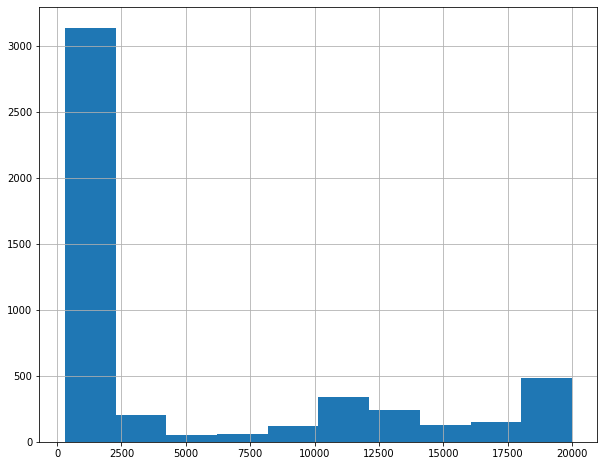

In [ ]:
fig, ax = plt.subplots(figsize = (10, 8))
fb_likes_cap.hist(ax = ax)

In [3]:
c1 = movie["title_year"] >= 2010
c2 = movie["title_year"].isna()
criteria = c1|c2

In [2]:
import pandas as pd
import numpy as np
movie = pd.read_csv("/content/drive/MyDrive/데이터 사이언스 + R/pandas_cookbook/pandas-cookbook-2e-main/data/movie.csv", index_col = "movie_title")

In [5]:
movie.mask(criteria.head())

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
movie_title,,,,,,,,,,,,,,,,,,,,,,,,,,,
Avatar,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,886204.0,4834.0,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000.0
Pirates of the Caribbean: At World's End,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,471220.0,48350.0,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0.0
Spectre,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
The Dark Knight Rises,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Star Wars: Episode VII - The Force Awakens,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Signed Sealed Delivered,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
The Following,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A Plague So Pleasant,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
movie_mask = movie.mask(criteria).dropna(how = "all")
movie_mask.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
movie_title,,,,,,,,,,,,,,,,,,,,,,,,,,,
Avatar,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,886204.0,4834.0,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000.0
Pirates of the Caribbean: At World's End,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,471220.0,48350.0,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0.0
Spider-Man 3,Color,Sam Raimi,392.0,156.0,0.0,4000.0,James Franco,24000.0,336530303.0,Action|Adventure|Romance,J.K. Simmons,383056.0,46055.0,Kirsten Dunst,0.0,sandman|spider man|symbiote|venom|villain,http://www.imdb.com/title/tt0413300/?ref_=fn_t...,1902.0,English,USA,PG-13,258000000.0,2007.0,11000.0,6.2,2.35,0.0
Harry Potter and the Half-Blood Prince,Color,David Yates,375.0,153.0,282.0,10000.0,Daniel Radcliffe,25000.0,301956980.0,Adventure|Family|Fantasy|Mystery,Alan Rickman,321795.0,58753.0,Rupert Grint,3.0,blood|book|love|potion|professor,http://www.imdb.com/title/tt0417741/?ref_=fn_t...,973.0,English,UK,PG,250000000.0,2009.0,11000.0,7.5,2.35,10000.0
Superman Returns,Color,Bryan Singer,434.0,169.0,0.0,903.0,Marlon Brando,18000.0,200069408.0,Action|Adventure|Sci-Fi,Kevin Spacey,240396.0,29991.0,Frank Langella,0.0,crystal|epic|lex luthor|lois lane|return to earth,http://www.imdb.com/title/tt0348150/?ref_=fn_t...,2367.0,English,USA,PG-13,209000000.0,2006.0,10000.0,6.1,2.35,0.0


In [7]:
movie_boolean = movie[movie["title_year"] < 2010 ]
movie_mask.equals(movie_boolean)

False

In [9]:
movie_mask.shape == movie_boolean.shape

True

In [10]:
movie_mask.dtypes == movie_boolean.dtypes

color                         True
director_name                 True
num_critic_for_reviews        True
duration                      True
director_facebook_likes       True
actor_3_facebook_likes        True
actor_2_name                  True
actor_1_facebook_likes        True
gross                         True
genres                        True
actor_1_name                  True
num_voted_users              False
cast_total_facebook_likes    False
actor_3_name                  True
facenumber_in_poster          True
plot_keywords                 True
movie_imdb_link               True
num_user_for_reviews          True
language                      True
country                       True
content_rating                True
budget                        True
title_year                    True
actor_2_facebook_likes        True
imdb_score                    True
aspect_ratio                  True
movie_facebook_likes         False
dtype: bool

In [11]:
from pandas.testing import assert_frame_equal
assert_frame_equal(
    movie_boolean, movie_mask, check_dtype = False
)

In [12]:
c1 = movie["content_rating"] == "G"
c2 = movie["imdb_score"] < 4
criteria = c1 & c2

In [13]:
movie_loc = movie.loc[criteria]
movie_loc.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
movie_title,,,,,,,,,,,,,,,,,,,,,,,,,,,
The True Story of Puss'N Boots,Color,Jérôme Deschamps,4.0,80.0,0.0,0.0,André Wilms,44.0,NaN,Adventure|Animation|Comedy,Yolande Moreau,753,53,Jérôme Deschamps,0.0,cartoon cat|cat|character name in title|puss i...,http://www.imdb.com/title/tt1239462/?ref_=fn_t...,24.0,English,France,G,25000000.0,2009.0,9.0,2.9,NaN,90
Doogal,Color,Dave Borthwick,31.0,77.0,3.0,593.0,Kylie Minogue,787.0,7382993.0,Adventure|Animation|Comedy|Family|Fantasy,Jimmy Fallon,3851,2185,Jon Stewart,0.0,diamond|lava|magic|mountain|sorcerer,http://www.imdb.com/title/tt0763304/?ref_=fn_t...,114.0,English,USA,G,20000000.0,2006.0,690.0,2.8,1.85,346
Thomas and the Magic Railroad,Color,Britt Allcroft,47.0,85.0,2.0,402.0,Colm Feore,1000.0,15911333.0,Adventure|Comedy|Drama|Family|Fantasy,Mara Wilson,2855,2429,Peter Fonda,1.0,locomotive|magic|mountain|railroad|steam locom...,http://www.imdb.com/title/tt0205461/?ref_=fn_t...,119.0,English,UK,G,19000000.0,2000.0,539.0,3.6,1.85,663
Barney's Great Adventure,Color,Steve Gomer,24.0,76.0,9.0,47.0,Kyla Pratt,595.0,11144518.0,Adventure|Family,Trevor Morgan,2724,1139,Shirley Douglas,0.0,apostrophe in title|critically bashed|hit on t...,http://www.imdb.com/title/tt0120598/?ref_=fn_t...,53.0,English,Canada,G,15000000.0,1998.0,417.0,2.8,1.85,436
Justin Bieber: Never Say Never,Color,Jon M. Chu,84.0,115.0,209.0,41.0,Sean Kingston,569.0,73000942.0,Documentary|Music,Usher Raymond,74351,714,Boys II Men,1.0,boyhood friend|manager|plasma tv|prodigy|star,http://www.imdb.com/title/tt1702443/?ref_=fn_t...,233.0,English,USA,G,13000000.0,2011.0,69.0,1.6,1.85,62000


In [14]:
movie_loc.equals(movie[criteria])

True

In [16]:
movie_loc.equals(movie[criteria])

True

In [17]:
movie_iloc = movie.iloc[criteria]

ValueError: ignored

In [18]:
movie_iloc = movie.iloc[criteria.to_numpy()]
movie_iloc.equals(movie_loc)

True

In [19]:
criteria_col = movie.dtypes == np.int64

In [21]:
criteria_col.head()

color                      False
director_name              False
num_critic_for_reviews     False
duration                   False
director_facebook_likes    False
dtype: bool

In [22]:
movie.iloc[:, criteria_col.to_numpy()].head()

,num_voted_users,cast_total_facebook_likes,movie_facebook_likes
movie_title,,,
Avatar,886204,4834,33000
Pirates of the Caribbean: At World's End,471220,48350,0
Spectre,275868,11700,85000
The Dark Knight Rises,1144337,106759,164000
Star Wars: Episode VII - The Force Awakens,8,143,0


In [25]:
cols = ["content_rating", "imdb_score", "title_year", "gross"]
movie.loc[criteria, cols].sort_values("imdb_score")

,content_rating,imdb_score,title_year,gross
movie_title,,,,
Justin Bieber: Never Say Never,G,1.6,2011.0,73000942.0
Sunday School Musical,G,2.5,2008.0,NaN
Doogal,G,2.8,2006.0,7382993.0
Barney's Great Adventure,G,2.8,1998.0,11144518.0
The True Story of Puss'N Boots,G,2.9,2009.0,NaN
Thomas and the Magic Railroad,G,3.6,2000.0,15911333.0


In [26]:
col_index = [movie.columns.get_loc(col) for col in cols]
col_index

[20, 24, 22, 8]

In [27]:
movie.iloc[criteria.to_numpy(), col_index].sort_values("imdb_score")

,content_rating,imdb_score,title_year,gross
movie_title,,,,
Justin Bieber: Never Say Never,G,1.6,2011.0,73000942.0
Sunday School Musical,G,2.5,2008.0,NaN
Doogal,G,2.8,2006.0,7382993.0
Barney's Great Adventure,G,2.8,1998.0,11144518.0
The True Story of Puss'N Boots,G,2.9,2009.0,NaN
Thomas and the Magic Railroad,G,3.6,2000.0,15911333.0


In [28]:
a = criteria.to_numpy()
a[:5]

array([False, False, False, False, False])

In [29]:
len(a)

4916

In [30]:
movie.select_dtypes(int)

,num_voted_users,cast_total_facebook_likes,movie_facebook_likes
movie_title,,,
Avatar,886204,4834,33000
Pirates of the Caribbean: At World's End,471220,48350,0
Spectre,275868,11700,85000
The Dark Knight Rises,1144337,106759,164000
Star Wars: Episode VII - The Force Awakens,8,143,0
...,...,...,...
Signed Sealed Delivered,629,2283,84
The Following,73839,1753,32000
A Plague So Pleasant,38,0,16
